# Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, I demonstrate entry-level data analytics in an online retail company, helping to interpret real-world data to help make a key business decision.

## Case Study
In this project, we worked with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. In this project, an exploration and analysis of this dataset was performed to obtain information about the store's sales trends, customer behavior, and most popular products. 

By conducting exploratory data analysis, we identified patterns, outliers and correlations in the data, which will allow us to make data-driven decisions and recommendations to optimize store operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the store's best-selling months, best-selling products, and most valuable customers. Ultimately, this project aims to provide actionable information that can drive strategic business decisions and improve overall store performance in the competitive online retail marketplace.


## Info
The python version of this project is: 3.12.4
The packages used for this project were:

- pandas
- numpy
- seaborn
- matplotlib

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset worked with is the “Online Retail” dataset. It contains transactional data from an online retail store from 2010 to 2011. The dataset is available as an .xlsx file named `Online Retail.xlsx`. 

The dataset contains the following columns

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique product code
- Description: Product description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique customer identifier
- Country: Country in which the transaction took place

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_excel("Online Retail.xlsx")

In [3]:
print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

In [4]:
df.shape

(541909, 8)

In [5]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


Let's look at the types, and how the columns _'Description'_ and _'CustomerID'_ have less than 541909 unfilled data.

Now that we know a little more about our data set, let's fill in those blanks and remove duplicate data.

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Now we know the amount of data that are null, this can happen either by human error or technical failure, decreasing the quality of the dataset.

As the corresponding columns represent information from a sale, we cannot delete them completely, so we will fill in these blanks.

In [7]:
df.fillna({"Description": "NA"}, inplace=True)
df.fillna({"CustomerID": 0.0}, inplace=True)

We will check again if the task has been accomplished

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Once those blanks are filled in, what data will be duplicated? Let's see:

In [9]:
df.duplicated().sum()

5268

Now let's remove the duplicates and check again how many duplicates there are and if the dataset size decreased.

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

It would make sense now for the number of rows to decrease:

In [12]:
df.shape

(536641, 8)

Our dataset no longer has unfilled spaces, nor duplicates, now we can start exploring the dataset.

In [13]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,11435.904653
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,0.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,0.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,14336.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16241.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,6795.044250


For this case, the CustomerID information is not relevant, since there are data that are not representative, such as “0”, since they made the purchase but we do not have their CustomerID data.

In [14]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.130156,NaN,97.233118


Note that there are negative values in Quantity and UnitPrice, this may represent a return, a discount, and that is why we will not eliminate them.
Also note that we do not have the total of the purchases made, for this, we create a Total Price column, and then we will organize it by InvoiceNo.

In [16]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34  


In [17]:
total_by_invoice = df.groupby('InvoiceNo')['TotalPrice'].sum().reset_index()
print(total_by_invoice)

      InvoiceNo  TotalPrice
0        536365      139.12
1        536366       22.20
2        536367      278.73
3        536368       70.05
4        536369       17.85
...         ...         ...
25895   C581484  -168469.60
25896   C581490      -32.53
25897   C581499     -224.69
25898   C581568      -54.75
25899   C581569       -7.50

[25900 rows x 2 columns]


Grouping thus shows us the total sales made, each invoice is a purchase in the online retail store.

In [18]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,TotalPrice
count,536641.000000,536641,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,18.123861
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 10:52:00,1.250000,3.750000
50%,3.000000,2011-07-19 14:04:00,2.080000,9.870000
75%,10.000000,2011-10-18 17:05:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,219.130156,NaN,97.233118,380.656263


Since we observed some trends of central measurement and dispersion, we will calculate these and more, to make a more meaningful analysis.

In [19]:
print("mean:",df["Quantity"].mean(),"\n"
"median:",df["Quantity"].median(),"\n"
"mode:",df["Quantity"].mode(),"\n"
"range:",df["Quantity"].max()-df["Quantity"].min(),"\n"
"variance:",df["Quantity"].var(),"\n"
"standard deviation:",df["Quantity"].std())

mean: 9.620029032444409 
median: 3.0 
mode: 0    1
Name: Quantity, dtype: int64 
range: 161990 
variance: 48018.02532598476 
standard deviation: 219.13015613097335


In [20]:
print("mean:",df["UnitPrice"].mean(),"\n"
"median:",df["UnitPrice"].median(),"\n"
"mode:",df["UnitPrice"].mode(),"\n"
"range:",df["UnitPrice"].max()-df["UnitPrice"].min(),"\n"
"variance:",df["UnitPrice"].var(),"\n"
"standard deviation:",df["UnitPrice"].std())

mean: 4.632655674836623 
median: 2.08 
mode: 0    1.25
Name: UnitPrice, dtype: float64 
range: 50032.06 
variance: 9454.27916555312 
standard deviation: 97.23311763773246


In [21]:
print("mean:",df["TotalPrice"].mean(),"\n"
"median:",df["TotalPrice"].median(),"\n"
"mode:",df["TotalPrice"].mode(),"\n"
"range:",df["TotalPrice"].max()-df["TotalPrice"].min(),"\n"
"variance:",df["TotalPrice"].var(),"\n"
"standard deviation:",df["TotalPrice"].std())

mean: 18.123861117581395 
median: 9.870000000000001 
mode: 0    15.0
Name: TotalPrice, dtype: float64 
range: 336939.2 
variance: 144899.1906691031 
standard deviation: 380.6562631418313


In [23]:
df_Dfiltered = df[df['Description'] != 'NA']


Now let's look at the frequencies for the Description, CustomerID, Country, and other columns.

In [31]:
frequency_Description=df_Dfiltered["Description"].value_counts()
print(frequency_Description)

Description
WHITE HANGING HEART T-LIGHT HOLDER     2357
REGENCY CAKESTAND 3 TIER               2189
JUMBO BAG RED RETROSPOT                2156
PARTY BUNTING                          1720
LUNCH BAG RED RETROSPOT                1625
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY           1
SET 36 COLOURING PENCILS DOILEY           1
 I LOVE LONDON MINI RUCKSACK              1
found some more on shelf                  1
Name: count, Length: 4223, dtype: int64


We can quickly see the descriptions more frequently

In [30]:
df_CIDfiltered = df[df['CustomerID'] != '0.0']

In [32]:
frequency_CustomerID=df_CIDfiltered["CustomerID"].value_counts()
print(frequency_CustomerID)

CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: count, Length: 4372, dtype: int64


In [38]:
frecuency_Country=df["Country"].value_counts()
print(frecuency_Country)

Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [34]:
frecuency_InvoiceDate=df["InvoiceDate"].value_counts()
print(frecuency_InvoiceDate)

InvoiceDate
2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-07-21 17:32:00       1
2011-10-20 14:12:00       1
2011-10-20 14:10:00       1
2011-02-14 09:44:00       1
2011-10-27 11:11:00       1
Name: count, Length: 23260, dtype: int64


In [33]:
frecuency_Stockcode=df["StockCode"].value_counts()
print(frecuency_Stockcode)

StockCode
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: count, Length: 4070, dtype: int64


In [36]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


We already have an approximate knowledge of the dataset, now we will represent it graphically.
But first, let's see if there are any correlations worth representing.

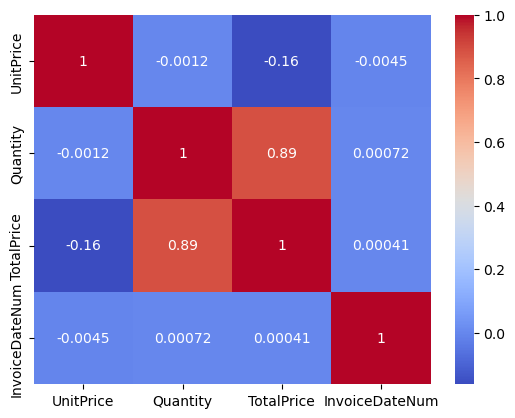

In [93]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['InvoiceDateNum'] = df['InvoiceDate'].map(pd.Timestamp.timestamp)


columns_to_correlate = ['UnitPrice','Quantity', 'TotalPrice', 'InvoiceDateNum']

correlation = df[columns_to_correlate].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')


plt.show()


As we can see, the only value greater than 0.8 (except for the diagonal of 1), is the correlation between Total Price and Quantity, which makes sense, since the greater the quantity of products, the greater the total price, which is nothing different and there are no other relationships between them worth mentioning.

Now we will plot some data and make their respective analysis.

<module 'matplotlib.pyplot' from 'c:\\Users\\Josue Florez\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

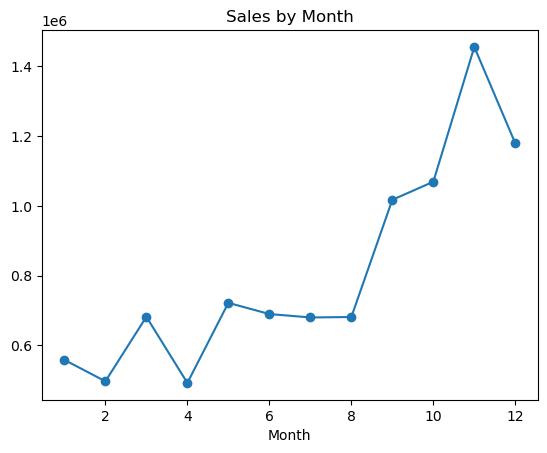

In [98]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
sales_by_month = df.groupby('Month')['TotalPrice'].sum()
sales_by_day = df.groupby('DayOfWeek')['TotalPrice'].sum()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(ordered_days)
sales_by_month.plot(kind='line',marker='o', linestyle='-')
plt.title("Sales by Month")
plt

Throughout the year, sales increase towards the end of the last quarter of the year, likely driven by events such as Halloween, Black Friday, and Christmas. This suggests that the products sold in the store are aligned with the demand for seasonal gifts and decorations.

Text(0.5, 1.0, 'Sales by Day')

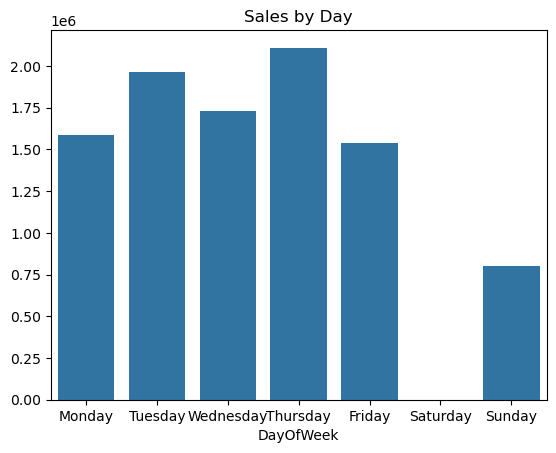

In [99]:

sns.barplot(x=sales_by_day.index, y=sales_by_day.values)
plt.title("Sales by Day")

Tuesdays and Thursdays are when sales are highest, and there is not much difference with Mondays, Wednesdays and Fridays, however Sundays represent low sales, and on Saturdays there are no sales, they may be temporarily closed on that day.

<module 'matplotlib.pyplot' from 'c:\\Users\\Josue Florez\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

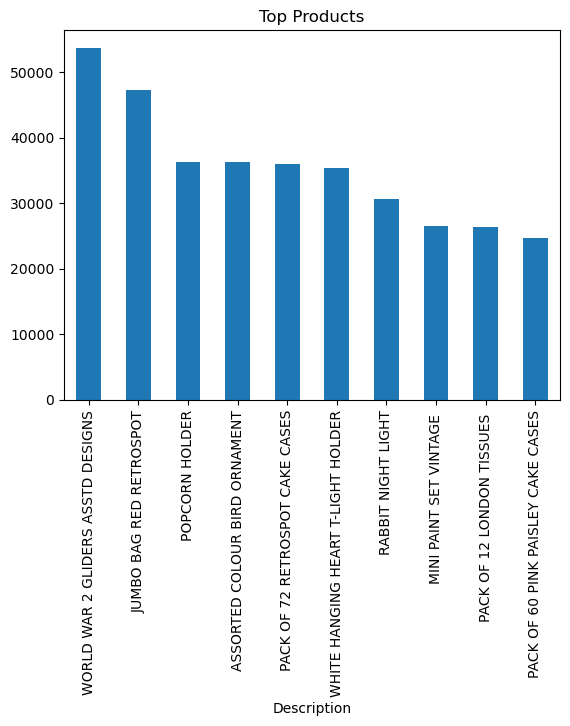

In [101]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

top_products.head(10).plot(kind='bar')
plt.title("Top Products")
plt

Best-selling products include decorative, practical and entertainment items, such as the “WORLD WAR 2 GLIDERS”, “JUMBO BAG RED RETROSPOT”, and “POPCORN HOLDER”, this suggests that customers are interested in nostalgic, retro and decorative items. This may be aligned with the trend of aesthetic or collector-driven purchases.

<module 'matplotlib.pyplot' from 'c:\\Users\\Josue Florez\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

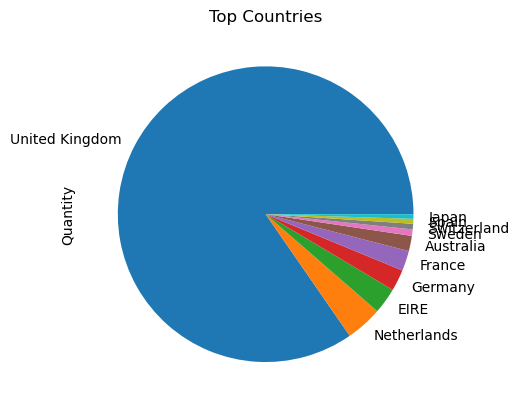

In [104]:
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

top_countries.head(10).plot(kind='pie')
plt.title("Top Countries")
plt

The United Kingdom is the store's main market, which may be related to geographic location, product preferences, or marketing specifically targeted to this country.

# Conclusion

### 1.Peak sales season in the last quarter of the year:
Take advantage of these dates to increase inventory of best-selling products, offer attractive promotions, and create specific marketing campaigns for these holidays. It may also be useful to start preparing for these peak seasons in advance in terms of logistics and inventory management.
### 2. Zero sales on Saturdays
If the store is closed on Saturdays, it might be useful to evaluate the possibility of opening to capture sales on the weekend, when many people tend to have more free time to shop. If it is already open, investigate why there are no sales on Saturdays and adjust the marketing strategy or promotions to encourage shopping on those days. In addition, concentrate promotional efforts or special events on Thursdays and Tuesdays to capitalize on those strong days.
### 3. The United Kingdom (UK) is the country with the most purchases:
Continue to focus marketing and promotional strategies on the UK to keep that market strong. At the same time, the possibility of expanding to other markets could be explored, using the success in the UK as a basis for comparison to capture other markets with similar characteristics.

### 4. Top 10 best-selling products:
Build on this analysis to increase the stock of these top products, cross-promote or cross-sell between them and other complementary items. In addition, investigate why these products are so popular (is it design, nostalgia, utility?) and use this information to develop or acquire new products with similar characteristics.
### 5. Possible areas for improvement:
Saturday promotions: identifying that there are no sales on Saturdays, a clear opportunity is to implement promotional strategies or discounts to attract sales during the weekend. Even campaigns such as “Saturday Specials” could encourage purchases.
Explore markets outside the UK: While the UK is the main market, there could be opportunities for expansion in other countries. Use top product data to identify whether products have potential in other international markets.
Diversify supply in off-peak seasons: As sales tend to be concentrated towards the end of the year, product diversification or special campaigns could be explored for off-peak months, such as mid-year promotions or seasonal products to keep sales stable.